# estimating pi with the monte carlo method

### method:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['lines.color'] = 'r'

def make_quarter_circle(radius):
    x = np.arange(0,radius, .001)
    y = np.sqrt(radius**2-x**2)
    return x,y

def approx_pi_non_graphical(iterations, radius):
    num_in_circle = 0
    num_out_circle = 0
    for i in range(num_iterations):
        x_val, y_val = np.random.uniform(low=0, high=radius), np.random.uniform(low=0, high=radius)
        if np.sqrt(x_val**2 + y_val**2) <= radius:
            num_in_circle += 1
        else:
            num_out_circle += 1
    area_ratio = num_in_circle / num_iterations
    return 4*radius**2*area_ratio / radius**2

def moving_average(data, window) :
    res = np.cumsum(data, dtype=float)
    res[window:] = res[window:] - res[:-window]
    return res[window - 1:] / window
    

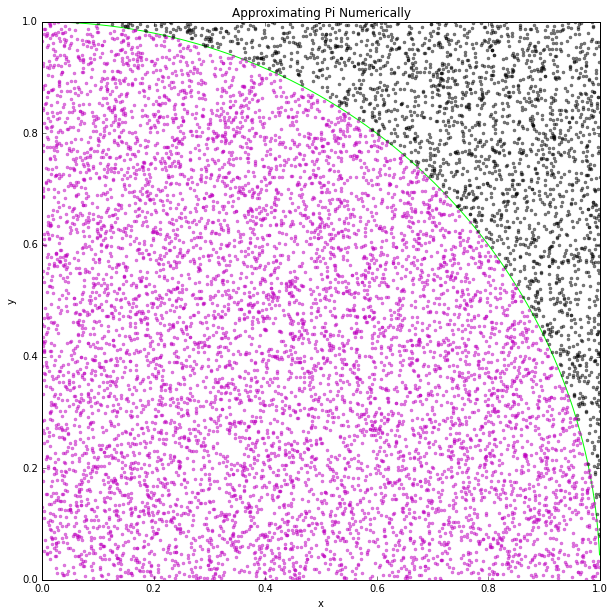

In [42]:
radius = 1
x, y = make_quarter_circle(radius)
plt.plot(x,y, 'lime')
num_iterations = 10000
num_in_circle = 0
num_out_circle = 0
for i in range(num_iterations):
    x_val, y_val = np.random.uniform(low=0, high=radius), np.random.uniform(low=0, high=radius)
    if np.sqrt(x_val**2 + y_val**2) <= radius:
        num_in_circle += 1
        plt.plot(x_val, y_val, 'm.', alpha=.5)
    else:
        num_out_circle += 1
        plt.plot(x_val, y_val, 'k.', alpha=.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximating Pi Numerically')
plt.show()

In [43]:
area_ratio = num_in_circle / num_iterations
pi_approx = 4*radius**2*area_ratio / radius**2
print('pi approximaton: {:.4f}'.format(pi_approx))

pi approximaton: 3.1252


In [31]:
iterations_non_graphical = np.arange(100,1000000,100)
percent_error = []
for iteration_count in iterations_non_graphical:
    print('approximating pi with {} random data points'.format(iteration_count))
    temp_result = approx_pi_non_graphical(iteration_count, radius)
    percent_error.append(abs(np.pi - temp_result)/np.pi)

approximating pi with 100 random data points
approximating pi with 200 random data points
approximating pi with 300 random data points
approximating pi with 400 random data points
approximating pi with 500 random data points
approximating pi with 600 random data points
approximating pi with 700 random data points
approximating pi with 800 random data points
approximating pi with 900 random data points
approximating pi with 1000 random data points
approximating pi with 1100 random data points
approximating pi with 1200 random data points
approximating pi with 1300 random data points
approximating pi with 1400 random data points
approximating pi with 1500 random data points
approximating pi with 1600 random data points
approximating pi with 1700 random data points
approximating pi with 1800 random data points
approximating pi with 1900 random data points
approximating pi with 2000 random data points
approximating pi with 2100 random data points
approximating pi with 2200 random data poin

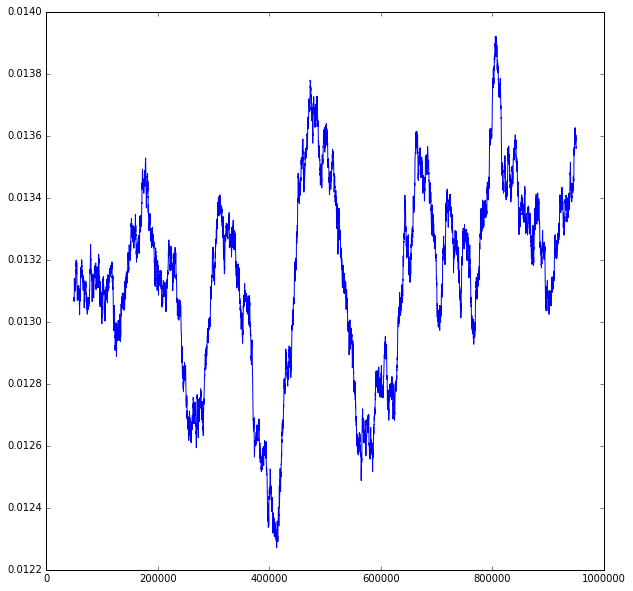

In [45]:
# plt.plot(iterations_non_graphical, percent_error)
iters, error = moving_average(iterations_non_graphical, 1000), moving_average(percent_error, 1000)
plt.plot(iters, error)
plt.show()